# Pyber 

### Loading & Reading CSV files

In [247]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [248]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [249]:
#  1. Get the total rides for each city type
city_type_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_type_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [250]:
# 2. Get the total drivers for each city type
city_type_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
city_type_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [251]:
#  3. Get the total amount of fares for each city type
city_type_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
city_type_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [252]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = city_type_fares / city_type_rides
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [253]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = city_type_fares / city_type_drivers
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [254]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame ({"Total Rides" : city_type_rides,
               "Total Drivers": city_type_drivers,
               "Total Fares": city_type_fares,
                "Average Fare per Ride" : average_fare_ride,
                 "Average Fare per Driver" : average_fare_driver})

summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [255]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

In [256]:
#  8. Format the columns.
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)


summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [257]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [258]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum_by_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fare_sum_by_date_df

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [259]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_sum_by_date_df = fare_sum_by_date_df.reset_index()
fare_sum_by_date_df.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [260]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table_df = pd.pivot_table(fare_sum_by_date_df, index = "date", columns = "type", values = ['fare'], aggfunc = sum) 
pivot_table_df.head(10)

fare                
type           Rural Suburban  Urban
date                                
1/1/2019 0:08    NaN      NaN  37.91
1/1/2019 0:46    NaN    47.74    NaN
1/1/2019 12:32   NaN    25.56    NaN
1/1/2019 14:40   NaN      NaN   5.42
1/1/2019 14:42   NaN      NaN  12.31
1/1/2019 14:52   NaN    31.15    NaN
1/1/2019 17:22   NaN      NaN  42.11
1/1/2019 21:04   NaN      NaN  11.71
1/1/2019 2:07    NaN    24.07    NaN
1/1/2019 3:46    NaN      NaN   7.57

In [261]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_table_dates_df = pivot_table_df.loc['2019-01-01':'2019-04-29']
pivot_table_dates_df

Empty DataFrame
Columns: [(fare, Rural), (fare, Suburban), (fare, Urban)]
Index: []

In [266]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type(fare_dates_df.index)

pivot_table_dates_df.index = pd.to_datetime(pivot_table_dates_df.index).index = pd.to_datetime(pivot_table_dates_df.index)
pivot_table_dates_df.head()

Empty DataFrame
Columns: [(fare, Rural), (fare, Suburban), (fare, Urban)]
Index: []

In [267]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_table_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     0 non-null      float64
 1   (fare, Suburban)  0 non-null      float64
 2   (fare, Urban)     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [268]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_table_weekly_df = pivot_table_dates_df.resample('W').sum()
pivot_table_weekly_df

Empty DataFrame
Columns: [(fare, Rural), (fare, Suburban), (fare, Urban)]
Index: []

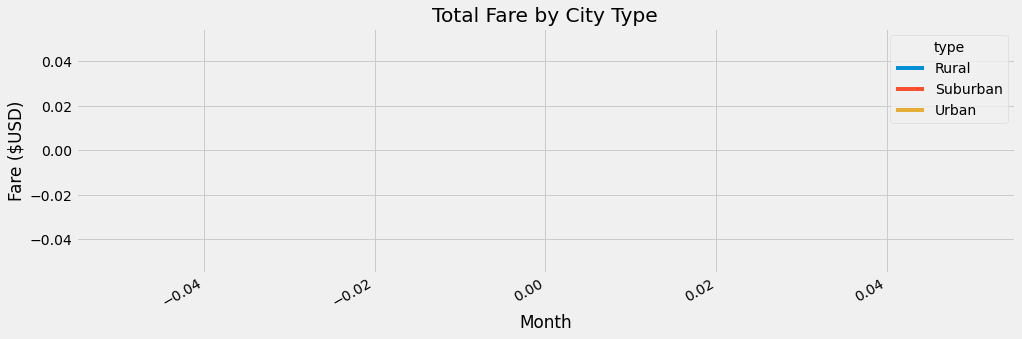

In [270]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')

fare_dates_df.plot(figsize=(15,5),)
plt.xlabel('Month')
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type');